Evaluation & Metrics – Resume Classification and Job Matching

This notebook evaluates two main NLP tasks in our project:

1. **Resume Classification**: Predicting job categories (e.g., IT, HR, Finance) from resume text.
2. **Resume–Job Matching**: Measuring how well a resume matches job postings using cosine similarity.

We simulate the outputs using dummy data to develop and validate our evaluation functions.


In [1]:
!pip install torch seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 95.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 79.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 43.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 80.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

## Step 1: Resume Classification – Evaluation

We use standard multi-class classification metrics:

- **Accuracy**: Overall correctness
- **Precision**: Correct predictions among positive labels
- **Recall**: Correct predictions among actual positives
- **F1-Score**: Harmonic mean of precision and recall
- **Confusion Matrix**: Visual summary of classification results

We simulate predicted and actual labels for 3 job categories.


Classification Metrics
------------------------------
Accuracy: 0.7142857142857143

Classification Report:
               precision    recall  f1-score   support

          HR       0.67      1.00      0.80         2
     Finance       0.67      0.67      0.67         3
          IT       1.00      0.50      0.67         2

    accuracy                           0.71         7
   macro avg       0.78      0.72      0.71         7
weighted avg       0.76      0.71      0.70         7



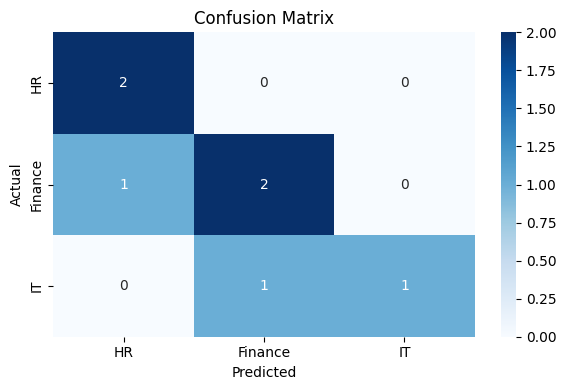

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_true = [0, 1, 2, 1, 0, 2, 1]
y_pred = [0, 1, 2, 0, 0, 1, 1]
labels = ['HR', 'Finance', 'IT']

def evaluate_classification(y_true, y_pred, labels):
    print("Classification Metrics")
    print("-" * 30)
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("\nClassification Report:\n", classification_report(y_true, y_pred, target_names=labels))

    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels, cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.tight_layout()
    plt.show()

evaluate_classification(y_true, y_pred, labels)

Step 2: Resume–Job Matching – Evaluation

We use **cosine similarity** between resume and job embeddings to measure textual similarity.

Metric used:
- **Top-K Accuracy**: Checks if the correct job appears in the Top-K recommendations.

In this demo, we simulate 5 resumes and 20 job postings using random vectors.

In [8]:
import torch

resume_emb = torch.rand(5, 384)
job_emb = torch.rand(20, 384)
true_job_indices = [3, 12, 7, 0, 18]

def top_k_accuracy(resume_emb, job_emb, true_job_indices, k=3):
    print("\n Resume-Job Matching Evaluation")
    print("-" * 40)
    results = []
    for i, r_emb in enumerate(resume_emb):
        cos_scores = torch.nn.functional.cosine_similarity(r_emb.unsqueeze(0), job_emb)
        top_k = torch.topk(cos_scores, k).indices.tolist()
        results.append(1 if true_job_indices[i] in top_k else 0)
    accuracy = sum(results) / len(results)
    print(f"Top-{k} Accuracy: {round(accuracy * 100, 2)}%")
    return accuracy

top_k_accuracy(resume_emb, job_emb, true_job_indices, k=3)


 Resume-Job Matching Evaluation
----------------------------------------
Top-3 Accuracy: 20.0%


0.2